In [1]:
import time
import pandas as pd
import numpy as np
import solv_fzcp as sfzcp
import uvarprob as uvpr
from processor_new import Estimator, Division

In [2]:
test_file = "./test/test_casado.csv"
# test_file = "./test/test11.csv"
# test_file = "../tst2.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

objective     a     b  min_f  \
name                                                                         
1                                   -0.5*x^2*(log(x))+5   0.2   7.0      0   
2                                -exp(-x)*sin(2*pi*x)+1   0.2   7.0      0   
3                                   -(sqrt(x))*sin(x)+1   0.2   7.0      0   
4            x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3   0.2   7.0      0   
5                                          x+sin(5.0*x)   0.2   7.0      0   
6                                           -x*sin(x)+5   0.2   7.0      0   
7                    sin(x)*cos(x)-1.5*(sin(x))^2.0+1.2   0.2   7.0      0   
8                                   2*cos(x)+cos(2*x)+5   0.2   7.0      0   
9                                    2.0*sin(x)*exp(-x)   0.2   7.0      0   
10                            (3*x-1.4)*sin(18.0*x)+1.7   0.2   7.0      0   
11                                      (x+1)^3/x^2-7.1   0.2   7.0      0   
12                                      exp(sin(3.0*x))   0.2   7.0      0   
13     12+cos(2.0*x+1)+2*cos(3.0*x+2)+3*cos(4.0*x+3)...   0.2   7.0      0   
14                                 2*(x-3)^2-exp(x/2)+5   0.2   7.0      0   
15                                       -exp(sin(x))+4   0.2   7.0      0   
16                            sqrt(x)*(sin(x))^2-(1e-6)   0.2   7.0      0   
17                                  cos(x)-sin(5.0*x)+1   0.2   7.0      0   
18                                    -x-sin(3.0*x)+1.6   0.2   7.0      0   
19                        cos(x)+2.0*cos(2.0*x)*exp(-x)   0.2   7.0      0   
20     -(sin(2*x+1)+2*sin(3*x+2)+3*sin(4*x+3)+4*sin(... -10.0  10.0      0   
21                                log(3.0*x)*log(2*x)-1   0.1   7.0      0   
22      -cos(2.0*x)-cos(3*x)-cos(4*x)-cos(5*x)-cos(6*x) -10.0  10.0      0   
23                             -exp(-x)*sin(2*pi*x)+0.5   0.0   4.0      0   
24                              (x^2-5*x+6)/(x^2+1)-0.5  -5.0   5.0      0   
25                                     -exp(sin(3*x))+1  -3.0   2.0      0   
26                                        -x+sin(3*x)+1   0.0   6.5      0   
27                             (x+sin(x))*exp(-x^2)+0.8  -5.0   5.0      0   

      min_x  
name         
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9         0  
10        0  
11        0  
12        0  
13        0  
14        0  
15        0  
16        0  
17        0  
18        0  
19        0  
20        0  
21        0  
22        0  
23        0  
24        0  
25        0  
26        0  
27        0

In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
from test import test_last, test_division

test_last(df, 1e-4, repeat=1, global_lip=False, div=Division.Falsi, alp=0.5)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.109 & 0.080 & 0.049 & 0.079 & 0.085 & 0.039 & 0.094 & 0.048 & 0.022 \\
2 & 0.021 & 0.098 & 0.065 & 0.110 & 0.100 & 0.056 & 0.050 & 0.084 & 0.081 \\
3 & 0.067 & 0.097 & 0.044 & 0.078 & 0.068 & 0.036 & 0.033 & 0.052 & 0.038 \\
4 & 0.145 & 0.143 & 0.116 & 0.140 & 0.116 & 0.074 & 0.063 & 0.060 & 0.049 \\
5 & 0.071 & 0.061 & 0.039 & 0.054 & 0.047 & 0.030 & 0.022 & 0.030 & 0.025 \\
6 & 0.014 & 0.037 & 0.020 & 0.019 & 0.016 & 0.020 & 0.018 & 0.017 & 0.015 \\
7 & 0.112 & 0.090 & 0.062 & 0.086 & 0.076 & 0.039 & 0.035 & 0.042 & 0.038 \\
8 & 0.009 & 0.037 & 0.030 & 0.023 & 0.019 & 0.017 & 0.015 & 0.021 & 0.019 \\
9 & 0.054 & 0.098 & 0.060 & 0.053 & 0.045 & 0.056 & 0.040 & 0.030 & 0.023 \\
10 & 0.123 & 0.186 & 0.131 & 0.133 & 0.125 & 0.101 & 0.092 & 0.088 & 0.089 \\
11 & 0.332 & 0.167 & 0.135 & 0.163 & 0.156 & 0.125 & 0.100 & 0.133 & 0.096 \\
12 & 0.008 & 0.120 & 0.100 & 0.182 & 0.144 & 0.076 & 0.073 & 0.123 & 0.104 \\
13 & 0.428 & 0.332

/Users/wuzhongqi/PycharmProjects/FirstZeroSolver/test.py:294: SyntaxWarning: invalid escape sequence '\ '
  return 'No\ root'


In [9]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=True, div=Division.Bisection)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.131 & 0.110 & 0.082 & 0.088 & 0.077 & 0.075 & 0.067 & 0.028 & 0.025 \\
2 & 0.029 & 0.117 & 0.102 & 0.131 & 0.120 & 0.060 & 0.055 & 0.074 & 0.075 \\
3 & 0.183 & 0.102 & 0.079 & 0.079 & 0.097 & 0.065 & 0.063 & 0.049 & 0.044 \\
4 & 0.227 & 0.116 & 0.091 & 0.111 & 0.086 & 0.086 & 0.064 & 0.063 & 0.049 \\
5 & 0.137 & 0.060 & 0.043 & 0.059 & 0.052 & 0.040 & 0.031 & 0.028 & 0.025 \\
6 & 0.022 & 0.029 & 0.023 & 0.024 & 0.019 & 0.015 & 0.014 & 0.015 & 0.014 \\
7 & 0.161 & 0.060 & 0.052 & 0.087 & 0.074 & 0.049 & 0.046 & 0.036 & 0.033 \\
8 & 0.012 & 0.023 & 0.016 & 0.019 & 0.013 & 0.011 & 0.010 & 0.016 & 0.014 \\
9 & 0.071 & 0.293 & 0.294 & 0.079 & 0.070 & 0.188 & 0.197 & 0.055 & 0.052 \\
10 & 0.160 & 0.426 & 0.416 & 0.154 & 0.145 & 0.246 & 0.240 & 0.089 & 0.085 \\
11 & 0.408 & 6.624 & 3.691 & 2.315 & 0.771 & 5.598 & 2.856 & 1.293 & 0.382 \\
12 & 0.010 & 0.187 & 0.130 & 0.108 & 0.056 & 0.134 & 0.078 & 0.055 & 0.039 \\
13 & 0.411 & 0.082

In [10]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=False, div=Division.Falsi)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.106 & 0.099 & 0.048 & 0.063 & 0.052 & 0.030 & 0.023 & 0.023 & 0.019 \\
2 & 0.016 & 0.116 & 0.082 & 0.124 & 0.112 & 0.054 & 0.051 & 0.081 & 0.100 \\
3 & 0.142 & 0.150 & 0.055 & 0.099 & 0.084 & 0.055 & 0.047 & 0.061 & 0.051 \\
4 & 0.222 & 0.168 & 0.124 & 0.157 & 0.139 & 0.089 & 0.069 & 0.071 & 0.081 \\
5 & 0.093 & 0.079 & 0.047 & 0.068 & 0.056 & 0.040 & 0.029 & 0.035 & 0.031 \\
6 & 0.019 & 0.046 & 0.024 & 0.025 & 0.019 & 0.024 & 0.018 & 0.021 & 0.018 \\
7 & 0.132 & 0.111 & 0.072 & 0.097 & 0.088 & 0.057 & 0.047 & 0.056 & 0.041 \\
8 & 0.014 & 0.055 & 0.035 & 0.027 & 0.022 & 0.019 & 0.017 & 0.024 & 0.021 \\
9 & 0.067 & 0.108 & 0.065 & 0.057 & 0.050 & 0.062 & 0.045 & 0.040 & 0.031 \\
10 & 0.136 & 0.209 & 0.148 & 0.150 & 0.143 & 0.112 & 0.102 & 0.103 & 0.099 \\
11 & 0.384 & 0.183 & 0.163 & 0.180 & 0.175 & 0.137 & 0.108 & 0.125 & 0.105 \\
12 & 0.008 & 0.127 & 0.106 & 0.196 & 0.159 & 0.083 & 0.066 & 0.126 & 0.099 \\
13 & 0.446 & 0.352

In [11]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=False, div=Division.Bisection)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.119 & 0.136 & 0.105 & 0.119 & 0.100 & 0.040 & 0.031 & 0.029 & 0.025 \\
2 & 0.023 & 0.139 & 0.091 & 0.148 & 0.139 & 0.065 & 0.069 & 0.139 & 0.096 \\
3 & 0.098 & 0.141 & 0.108 & 0.193 & 0.170 & 0.057 & 0.050 & 0.068 & 0.051 \\
4 & 0.207 & 0.244 & 0.198 & 0.246 & 0.223 & 0.100 & 0.139 & 0.181 & 0.068 \\
5 & 0.131 & 0.119 & 0.070 & 0.096 & 0.083 & 0.043 & 0.032 & 0.037 & 0.033 \\
6 & 0.021 & 0.050 & 0.026 & 0.034 & 0.021 & 0.027 & 0.020 & 0.024 & 0.020 \\
7 & 0.153 & 0.151 & 0.124 & 0.192 & 0.173 & 0.065 & 0.051 & 0.063 & 0.047 \\
8 & 0.015 & 0.050 & 0.037 & 0.029 & 0.024 & 0.022 & 0.019 & 0.027 & 0.031 \\
9 & 0.071 & 0.157 & 0.134 & 0.115 & 0.104 & 0.079 & 0.053 & 0.043 & 0.034 \\
10 & 0.149 & 0.260 & 0.189 & 0.197 & 0.185 & 0.124 & 0.116 & 0.113 & 0.107 \\
11 & 0.393 & 0.216 & 0.168 & 0.264 & 0.237 & 0.139 & 0.105 & 0.142 & 0.109 \\
12 & 0.008 & 0.138 & 0.115 & 0.209 & 0.173 & 0.094 & 0.069 & 0.139 & 0.104 \\
13 & 0.460 & 0.407

In [12]:
from test import test_linear

test_linear(df, 1e-8, repeat=1)

test.Index,IBB,PL_N,PI_N,PL_R,PI_R
$1$ & $0.170$ & $0.144$ & $0.114$ & $0.098$ & $0.088$ & $0.150$ & $0.140$ & $0.037$ & $0.031$ \\
$2$ & $0.028$ & $0.107$ & $0.094$ & $0.057$ & $0.059$ & $0.108$ & $0.130$ & $0.071$ & $0.065$ \\
$3$ & $0.149$ & $0.147$ & $0.133$ & $0.098$ & $0.096$ & $0.215$ & $0.197$ & $0.054$ & $0.051$ \\
$4$ & $0.298$ & $0.143$ & $0.117$ & $0.111$ & $0.084$ & $0.556$ & $0.406$ & $0.114$ & $0.082$ \\
$5$ & $0.172$ & $0.100$ & $0.067$ & $0.076$ & $0.050$ & $0.143$ & $0.180$ & $0.052$ & $0.037$ \\
$6$ & $0.020$ & $0.027$ & $0.020$ & $0.014$ & $0.013$ & $0.039$ & $0.025$ & $0.024$ & $0.019$ \\
$7$ & $0.250$ & $0.097$ & $0.089$ & $0.077$ & $0.075$ & $0.233$ & $0.209$ & $0.066$ & $0.056$ \\
$8$ & $0.012$ & $0.022$ & $0.014$ & $0.010$ & $0.009$ & $0.053$ & $0.036$ & $0.019$ & $0.017$ \\
$9$ & $0.120$ & $0.784$ & $0.725$ & $0.437$ & $0.429$ & $0.223$ & $0.206$ & $0.073$ & $0.059$ \\
$10$ & $0.204$ & $0.528$ & $0.519$ & $0.295$ & $0.294$ & $0.395$ & $0.272$ & $0.125$ & $0.11

In [13]:
from test import test_division

test_division(df, 1e-8, repeat=100, alp=0.5, reduction=True,rho_g=36,rho_l=36)

№, Bisection, Piyavskii, Casado, Falsi, FalsiTan
$1$ & $0.122$ & $0.077$ & $0.089$ & $0.103$ & $0.068$ & $0.027$ & $0.027$ & $0.030$ & $0.029$ \\
$2$ & $0.004$ & $0.031$ & $0.035$ & $0.041$ & $0.032$ & $0.044$ & $0.046$ & $0.048$ & $0.043$ \\
$3$ & $0.087$ & $0.072$ & $0.084$ & $0.092$ & $0.069$ & $0.034$ & $0.034$ & $0.033$ & $0.033$ \\
$4$ & $0.197$ & $0.062$ & $0.065$ & $0.066$ & $0.059$ & $0.062$ & $0.057$ & $0.067$ & $0.067$ \\
$5$ & $0.127$ & $0.035$ & $0.042$ & $0.049$ & $0.033$ & $0.024$ & $0.024$ & $0.028$ & $0.021$ \\
$6$ & $0.007$ & $0.009$ & $0.011$ & $0.013$ & $0.009$ & $0.017$ & $0.015$ & $0.019$ & $0.017$ \\
$7$ & $0.175$ & $0.055$ & $0.059$ & $0.070$ & $0.050$ & $0.042$ & $0.042$ & $0.049$ & $0.040$ \\
$8$ & $0.004$ & $0.007$ & $0.007$ & $0.007$ & $0.007$ & $0.014$ & $0.013$ & $0.013$ & $0.013$ \\
$9$ & $0.095$ & $0.364$ & $0.409$ & $0.522$ & $0.363$ & $0.054$ & $0.050$ & $0.048$ & $0.039$ \\
$10$ & $0.167$ & $0.267$ & $0.306$ & $0.387$ & $0.279$ & $0.100$ & $0.094$ & $

In [14]:
import interval as ival


def get_full_interval(intervals):
    if len(intervals) == 0:
        return 'No root'
    else:
        if isinstance(intervals[0], tuple):
            return ival.Interval([intervals[0][0].x[0], intervals[-1][0].x[1]])
        else:
            return ival.Interval([intervals[0].x[0], intervals[-1].x[1]])


res_list = [0] * len(list(df.itertuples()))
for i, test in enumerate(df.itertuples()):
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [], 'bnb2_psl_points_list': [],
                             'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']), True)
    res = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
                           estimator=Estimator.PSQE, reduction=1).first_crossing_zero_point
    res_list[i] = res
    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=2, reduction=1)
    # print('QI_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSQE, reduction=1)
    # print('QI_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSQE, reduction=1)
    # print('QL_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # plr = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=1)
    # print('PI_R:', plr.nsteps)
    # print('width of full interval', get_full_interval(plr.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # plr = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=1)
    # print('PL_R:', plr.nsteps)
    # print('width of full interval', get_full_interval(plr.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    T1 = time.perf_counter()
    pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
                           estimator=Estimator.PSL, reduction=False, div=Division.Bisection, alp=0)
    print('QL_N:', pln.nsteps)
    print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

    T1 = time.perf_counter()
    pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
                           estimator=Estimator.PSL, reduction=False, div=Division.Falsi, alp=0)
    print('QL_N:', pln.nsteps)
    print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

    T1 = time.perf_counter()
    pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
                           estimator=Estimator.PSL, reduction=False, div=Division.FalsiTan, alp=0)
    print('QL_N:', pln.nsteps)
    print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
    #                        estimator=Estimator.PSL, reduction=0)
    # print('PL_N:', pln.nsteps)
    # print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # ibb = sfzcp.cas(prob=prob, epsilon=(test.b - test.a) * (1e-4))
    # print('IBB:', ibb)
    # print('Full interval', get_full_interval(ibb.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

1
QL_N: 57
width of full interval [3.011, 3.012]
time= 0.16058399978646776
QL_N: 55
width of full interval [3.01, 3.012]
time= 0.11008299998138682
QL_N: 57
width of full interval [3.011, 3.012]
time= 0.1042919998326397
2
QL_N: 67
width of full interval No root
time= 0.15162499994403333
QL_N: 67
width of full interval No root
time= 0.11358299980201991
QL_N: 67
width of full interval No root
time= 0.10324999993827078
3
QL_N: 56
width of full interval [1.174, 1.175]
time= 0.12287500021557207
QL_N: 53
width of full interval [1.174, 1.175]
time= 0.2345829998375848
QL_N: 55
width of full interval [1.174, 1.175]
time= 0.10016599981099716
4
QL_N: 70
width of full interval [2.96, 2.961]
time= 0.13362500021685264
QL_N: 74
width of full interval [2.96, 2.961]
time= 0.4229589999340533
QL_N: 74
width of full interval [2.96, 2.961]
time= 0.29379199986578897
5
QL_N: 41
width of full interval [0.82, 0.821]
time= 0.07308300018848968
QL_N: 34
width of full interval [0.82, 0.821]
time= 0.0547919999007717

3.0116907710390746
1.1748624894704434
2.9607324702421582
0.8209239701115811
1.3409793858337893
3.141592657840757
1.2655389178881162
1.364646352973308
4.7830778323016725
3.2810986189396454
3.140841483068506
1.5707963237450722
1.968571239652619
1.1407136128825441
-9.140464101347806
0.14716146797654278
-9.817082028577747
0.09237963488105505
1.258342236748872
-2.094395102393274
1.0353963147820575
-0.8002122558746276


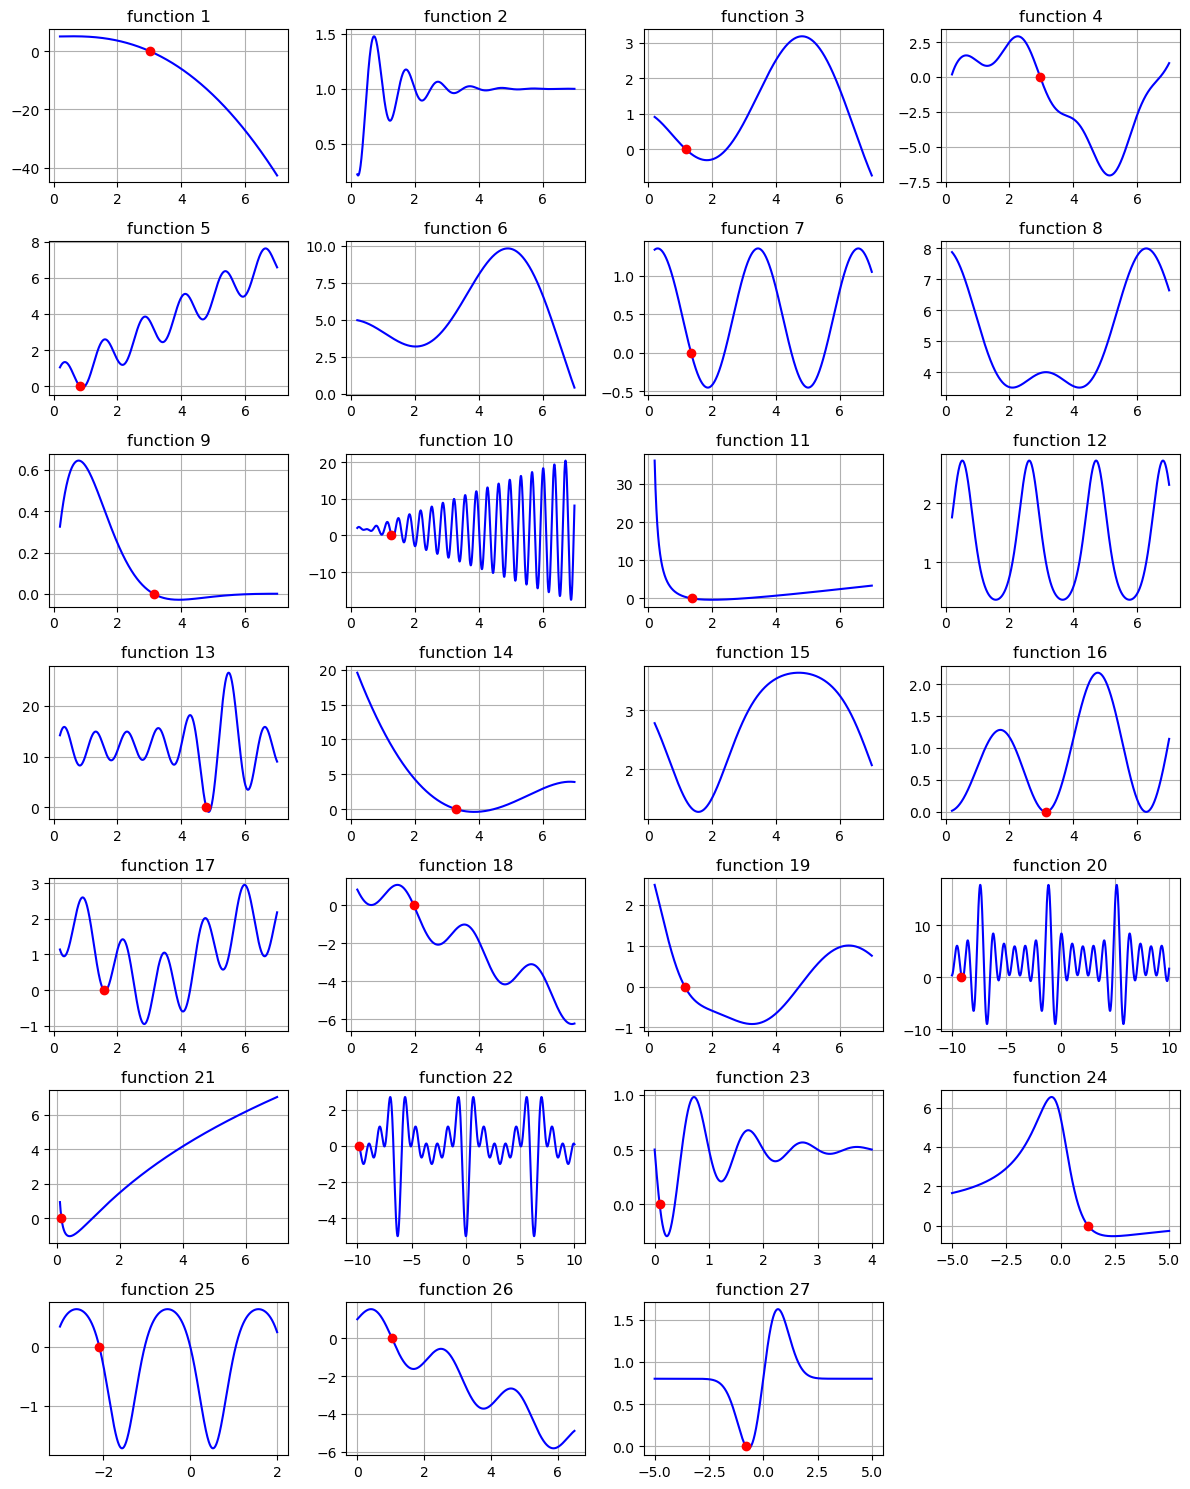

In [15]:
import matplotlib.pyplot as plt

cols = 4
fig, axes = plt.subplots(7, cols, figsize=(12, 15))


def sub_plot_problem(prob, tips, zero, npoints=1000):
    """
       Plots a problem
       
       Parameters
       ----------
       prob : UniVarProblem
           The problem to plot
       npoints : int
           number of points used to draw a plot
       """
    step = (prob.b - prob.a) / npoints
    ta = np.arange(prob.a, prob.b + step, step)
    num_points = len(ta)
    fta = np.empty([num_points])

    for i in range(num_points):
        fta[i] = prob.objective(ta[i])

    ax.plot(ta, fta, tips['function'])
    if len(zero) != 0:
        z = zero[0][0].mid()
        print(z)
        ax.scatter(z, 0, color='red', zorder=3)
        # ax.text(z-0.2, 0, rf'$x^*$', fontsize=12, ha='center', color='red')
    # ax.ylim([lb - d - legend, ub + d])


for i, test in enumerate(df.itertuples()):
    ax = axes[i // cols, i % cols]
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    sub_plot_problem(prob, {'function': 'b-'}, res_list[i])
    ax.set_title(f'function {i + 1}')
    ax.grid(True)

# for j in range(len(df.itertuples()), cols * 7):
fig.delaxes(axes.flatten()[27])

plt.tight_layout()
# plt.show()
plt.savefig('./all_funs.png', dpi=500)
